In [40]:
import torch

In [41]:
generator = torch.load('./GAN weights/generator.pt')
discriminator = torch.load('./GAN weights/discriminator.pt')

C:\Users\vishw\AppData\Local\Temp\ipykernel_2652\1745761799.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator = torch.load('./GAN weights/generator.pt')
C:\Users

In [42]:
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Linear(in_features=1024, out_features=784, bias=True)
    (12): Tanh()
  )
)

In [43]:
discriminator.eval()

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2, inplace=True)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [47]:
latent_dim = 100
z = torch.randn(64, latent_dim).to('cuda')  # Batch of 64 random latent vectors
generated_imgs = generator(z)

In [48]:
generated_imgs_cpu = generated_imgs.cpu().detach().numpy()

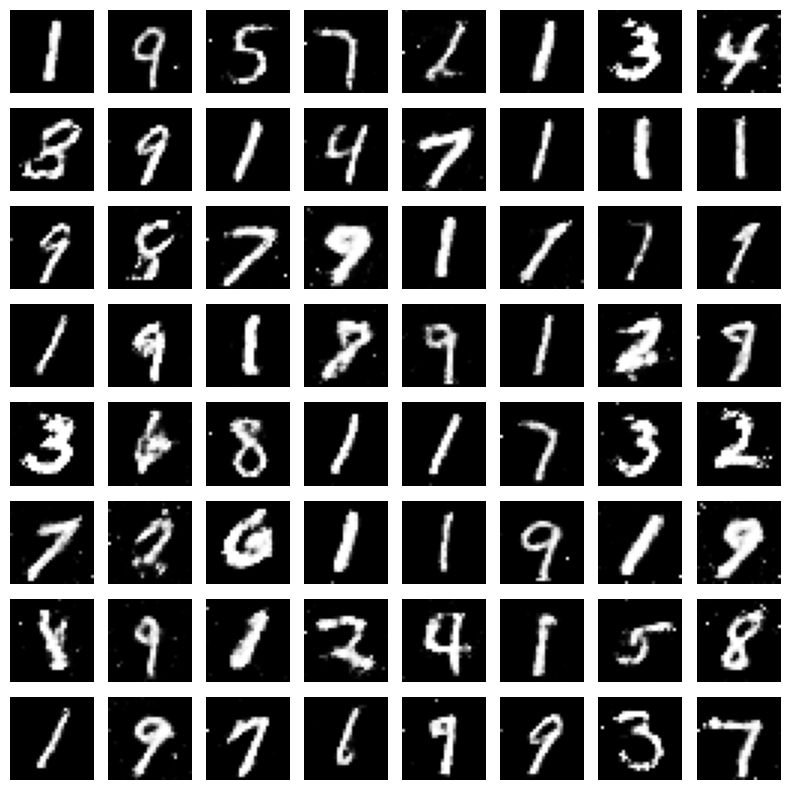

In [49]:
import matplotlib.pyplot as plt

# Reshape to (batch_size, height, width) assuming grayscale images
generated_imgs_cpu = generated_imgs_cpu.reshape(64, 28, 28)

# Set up the plot grid (8x8 for 64 images)
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

# Loop through each image and add it to the grid
for i, ax in enumerate(axes.flat):
    ax.imshow(generated_imgs_cpu[i], cmap='gray')
    ax.axis('off')  # Hide axes for cleaner display

plt.tight_layout()
plt.show()
